# Secret Hitler Analysis

**Secret Hitler** is a social deductive game for 5-10 players. Our goal is to implement the game fully and analyze different strategies for the game.

## Game information

Secret Hitler is heavily based on hidden information. There are three types that the players are randomly assigned - Liberal, Fascist and Hitler. At the start of the game, every player knows his type. Fascists also know the types of all players (Hitler doesn't).

In [1]:
import seaborn as sns
sns.set() # better graphs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

Path('figures').mkdir(parents=True, exist_ok=True) # create directory for figures

First, we will read our tournament results.

In [2]:
df_raw = pd.read_csv('results.csv')

In [3]:
df_raw['LiberalStrategy'] = df_raw['LiberalStrategy'].astype('category')
df_raw['FascistStrategy'] = df_raw['FascistStrategy'].astype('category')
df_raw['HitlerStrategy'] = df_raw['HitlerStrategy'].astype('category')
df_raw['FascistWinrate'] = df_raw['FascistWins'] / (df_raw['FascistWins'] + df_raw['LiberalWins'])
df_raw['LiberalWinrate'] = 1 - df_raw['FascistWinrate']

df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   LiberalStrategy  1800 non-null   category
 1   FascistStrategy  1800 non-null   category
 2   HitlerStrategy   1800 non-null   category
 3   FascistPolicies  1800 non-null   int64   
 4   LiberalPolicies  1800 non-null   int64   
 5   HitlerElected    1800 non-null   int64   
 6   HitlerExecuted   1800 non-null   int64   
 7   FascistWins      1800 non-null   int64   
 8   LiberalWins      1800 non-null   int64   
 9   FascistWinrate   1800 non-null   float64 
 10  LiberalWinrate   1800 non-null   float64 
dtypes: category(3), float64(2), int64(6)
memory usage: 118.5 KB


LiberalStrategy   FascistStrategy   HitlerStrategy  FascistPolicies  \
0         cfr_9Ms  paranoid_fascist  paranoid_hitler            10808   
1         cfr_9Ms  paranoid_fascist  paranoid_hitler            10933   
2         cfr_9Ms  paranoid_fascist  paranoid_hitler            10936   
3         cfr_9Ms  paranoid_fascist  paranoid_hitler            10809   
4         cfr_9Ms  paranoid_fascist  paranoid_hitler            10787   

   LiberalPolicies  HitlerElected  HitlerExecuted  FascistWins  LiberalWins  \
0             4893          82155            2144        92963         7037   
1             4806          82176            2085        93109         6891   
2             4934          81991            2139        92927         7073   
3             4784          82299            2108        93108         6892   
4             4893          82234            2086        93021         6979   

   FascistWinrate  LiberalWinrate  
0         0.92963         0.07037  
1         0.93109         0.06891  
2         0.92927         0.07073  
3         0.93108         0.06892  
4         0.93021         0.06979

We will fix the Hitler strategy to be from the same family as fascist strategy for simplicity, so we don't have to graph all the fascist-Hitler strategy pairs ($n^2$ strategies). Therefore, the following calculations don't take into account the synergy of different Hitler and fascist strategies.

In [4]:
def is_fascist_pair(row):
    return (row['FascistStrategy'] == row['HitlerStrategy']) or (row['FascistStrategy'].replace('fascist', 'hitler') == row['HitlerStrategy'])

filtered = df_raw[df_raw.apply(is_fascist_pair, axis=1)]
grouped = filtered.groupby(['LiberalStrategy', 'FascistStrategy'])
df = pd.concat([grouped.mean(), grouped.std().add_suffix('_std'), 2 * grouped.std().add_suffix('_ci')], axis=1).reset_index() # confidence interval 99.7% - https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule, assumes normal distribution
df.head()

LiberalStrategy        FascistStrategy  FascistPolicies  LiberalPolicies  \
0         cfr_1Ms                cfr_1Ms            253.1          91750.4   
1         cfr_1Ms                cfr_9Ms            242.7          91752.8   
2         cfr_1Ms  countersimple_fascist           7780.8          30374.2   
3         cfr_1Ms       paranoid_fascist          10915.3           4885.4   
4         cfr_1Ms         random_fascist          12048.4          57898.2   

   HitlerElected  HitlerExecuted  FascistWins  LiberalWins  FascistWinrate  \
0         7248.5           748.0       7501.6      92498.4        0.075016   
1         7265.9           738.6       7508.6      92491.4        0.075086   
2        56616.8          5228.2      64397.6      35602.4        0.643976   
3        82110.3          2089.0      93025.6       6974.4        0.930256   
4        26570.3          3483.1      38618.7      61381.3        0.386187   

   LiberalWinrate  ...  FascistWinrate_std  LiberalWinrate_std  \
0        0.924984  ...            0.000940            0.000940   
1        0.924914  ...            0.000791            0.000791   
2        0.356024  ...            0.001959            0.001959   
3        0.069744  ...            0.000918            0.000918   
4        0.613813  ...            0.001545            0.001545   

   FascistPolicies_ci  LiberalPolicies_ci  HitlerElected_ci  \
0           21.529308          219.462373        186.538647   
1           25.069681          156.630634        161.593317   
2          168.160770          354.772916        431.318186   
3          297.385720          142.648597        311.144197   
4          177.128202          268.949892        295.023991   

   HitlerExecuted_ci  FascistWins_ci  LiberalWins_ci  FascistWinrate_ci  \
0          57.480431      187.953186      187.953186           0.001880   
1          54.480985      158.145362      158.145362           0.001581   
2         191.482636      391.849404      391.849404           0.003918   
3          71.572807      183.553080      183.553080           0.001836   
4          96.987743      308.949546      308.949546           0.003089   

   LiberalWinrate_ci  
0           0.001880  
1           0.001581  
2           0.003918  
3           0.001836  
4           0.003089  

[5 rows x 26 columns]

In [5]:
df.describe()

FascistPolicies  LiberalPolicies  HitlerElected  HitlerExecuted  \
count        30.000000        30.000000      30.000000       30.000000   
mean      23055.656667     41426.766667   32138.033333     3379.543333   
std       27448.547859     32163.960156   30312.272577     2940.580957   
min         206.000000        96.000000       0.000000        0.000000   
25%        4646.075000     11180.850000    7258.700000      743.525000   
50%       10899.350000     38578.050000   26487.150000     3357.850000   
75%       34143.325000     62138.925000   56600.150000     5261.650000   
max       86523.700000     91752.800000   82150.600000     9744.100000   

        FascistWins   LiberalWins  FascistWinrate  LiberalWinrate  \
count     30.000000     30.000000       30.000000       30.000000   
mean   55193.690000  44806.310000        0.551937        0.448063   
std    31821.057152  31821.057152        0.318211        0.318211   
min     7501.600000   3334.200000        0.075016        0.033342   
25%    29338.950000  13515.575000        0.293389        0.135156   
50%    57201.000000  42799.000000        0.572010        0.427990   
75%    86484.425000  70661.050000        0.864844        0.706610   
max    96665.800000  92498.400000        0.966658        0.924984   

       FascistPolicies_std  LiberalPolicies_std  ...  FascistWinrate_std  \
count            30.000000            30.000000  ...           30.000000   
mean             84.327773           108.071816  ...            0.001153   
std              53.922505            46.259592  ...            0.000380   
min              10.764654            10.551461  ...            0.000417   
25%              42.741678            80.978855  ...            0.000900   
50%              82.812732           107.339635  ...            0.001036   
75%             107.946990           139.398929  ...            0.001461   
max             204.008605           195.773225  ...            0.001959   

       LiberalWinrate_std  FascistPolicies_ci  LiberalPolicies_ci  \
count           30.000000           30.000000           30.000000   
mean             0.001153          168.655545          216.143632   
std              0.000380          107.845009           92.519184   
min              0.000417           21.529308           21.102922   
25%              0.000900           85.483355          161.957711   
50%              0.001036          165.625464          214.679269   
75%              0.001461          215.893980          278.797857   
max              0.001959          408.017211          391.546450   

       HitlerElected_ci  HitlerExecuted_ci  FascistWins_ci  LiberalWins_ci  \
count         30.000000          30.000000       30.000000       30.000000   
mean         199.084011          98.930673      230.577086      230.577086   
std          121.655205          66.196043       75.975990       75.975990   
min            0.000000           0.000000       83.462833       83.462833   
25%          162.061845          54.805571      180.026352      180.026352   
50%          213.498398         101.556099      207.202237      207.202237   
75%          298.480329         122.650287      292.149447      292.149447   
max          431.318186         259.660034      391.849404      391.849404   

       FascistWinrate_ci  LiberalWinrate_ci  
count          30.000000          30.000000  
mean            0.002306           0.002306  
std             0.000760           0.000760  
min             0.000835           0.000835  
25%             0.001800           0.001800  
50%             0.002072           0.002072  
75%             0.002921           0.002921  
max             0.003918           0.003918  

[8 rows x 24 columns]

The maximum standard deviation for winrates is 0.001959. That means the 95 % CI is <0.004 and so we don't have to plot the error bars (they are too small).

In [6]:
def graph_average_winrate(x='FascistStrategy',
                          y='LiberalStrategy',
                          condition='FascistWinrate',
                          title='',
                          color='red',
                          colormap='plasma',
                          draw_line=True,
                          figsize=(15, 6),
                          rot=0):
    codes = df[y].cat.codes
    cats = df[y].cat.categories
    df['tmp'] = df[x].cat.codes

    ax = df.plot(
        kind='scatter',
        title=title,
        x='tmp',
        y=condition,
        c=codes,
        colormap=colormap,
        ylim=(0, 1),
        yerr=f"{condition}_ci",
        figsize=figsize,
        legend=True,
        alpha=1.0,
        colorbar=False,
        rot=rot,
        zorder=1)
    df.groupby(x).mean().plot(ax=ax, kind='bar', y=condition, color=color, alpha=0.3, zorder=2)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap(colormap, len(cats)), 
                               norm=plt.Normalize(vmin=codes.min(),
                                                  vmax=codes.max()))
    sm._A = []
    tick_positions = (np.arange(len(cats)) + 0.5) * (len(cats) - 1) / len(cats) # centres of discrete labels
    cbar = plt.colorbar(sm, ticks=tick_positions, label=y)
    cbar.ax.set_yticklabels(cats)
    if draw_line:
        plt.axhline(y=0.5, linewidth=1, color=color, linestyle='-')

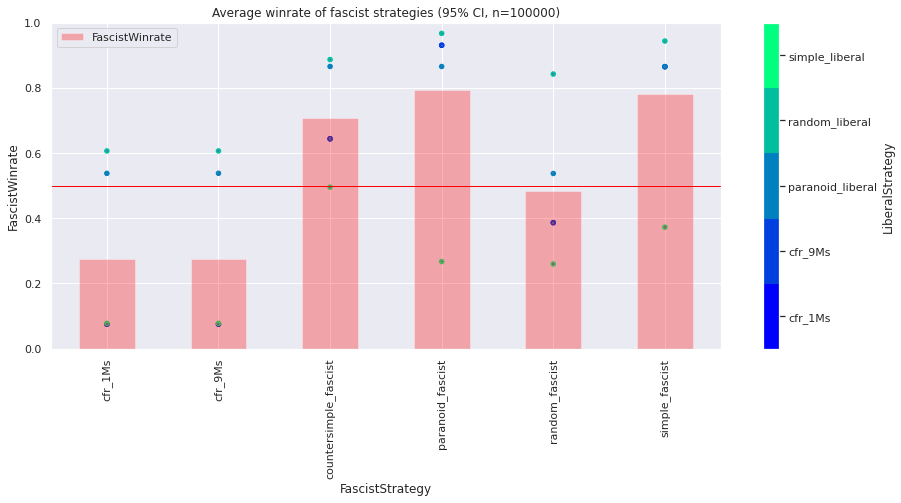

In [7]:
graph_average_winrate(title='Average winrate of fascist strategies (95% CI, n=100000)', colormap='winter')
plt.savefig('average_winrate_fascist.svg', bbox_inches="tight")

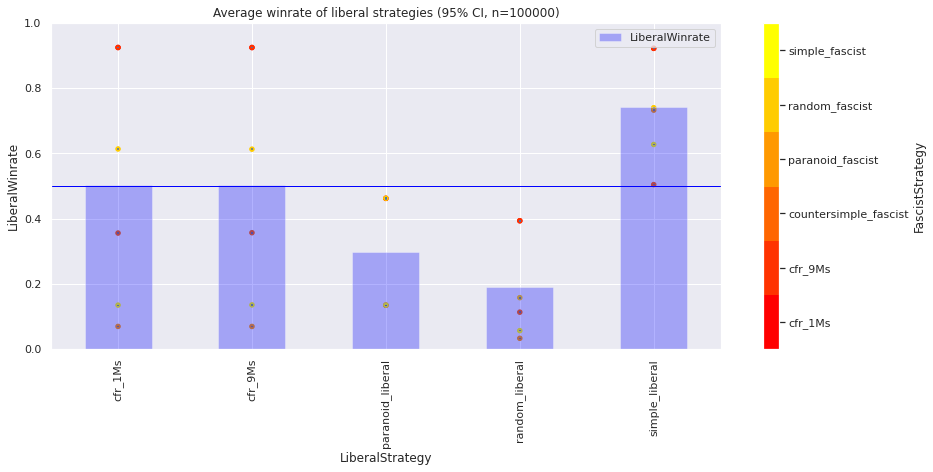

In [8]:
graph_average_winrate(x='LiberalStrategy', y='FascistStrategy', condition='LiberalWinrate', color='blue', colormap='autumn', title='Average winrate of liberal strategies (95% CI, n=100000)')
plt.savefig('average_winrate_liberal.svg', bbox_inches="tight")

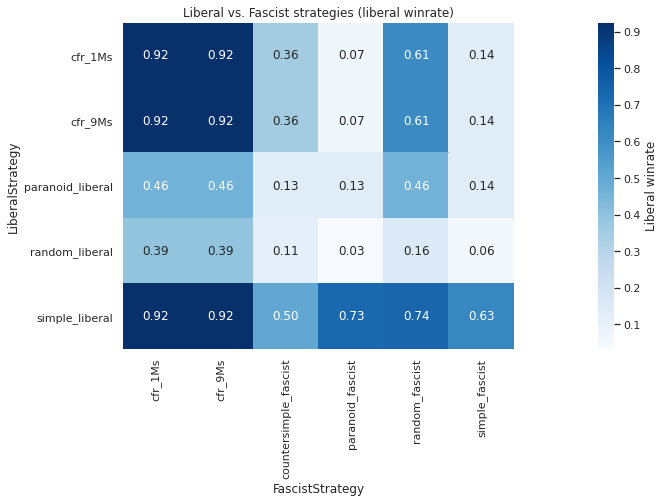

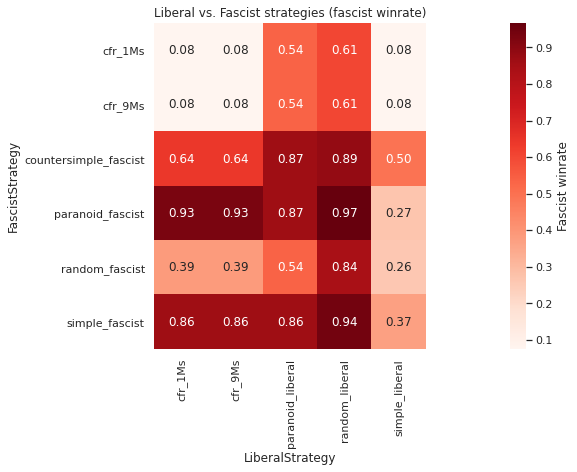

In [9]:
lib_vs_fas = df.pivot('LiberalStrategy', 'FascistStrategy', 'LiberalWinrate')
fas_vs_lib = df.pivot('FascistStrategy', 'LiberalStrategy', 'FascistWinrate')

plt.figure(figsize=(30, 6))
plt.title('Liberal vs. Fascist strategies (liberal winrate)')
sns.heatmap(data=lib_vs_fas, square=True, annot=True, cmap='Blues', cbar_kws={'label': 'Liberal winrate'}, fmt=".2f")
plt.savefig('liberal_vs_fascist_heatmap.svg', bbox_inches="tight")

plt.figure(figsize=(30, 6))
plt.title('Liberal vs. Fascist strategies (fascist winrate)')
sns.heatmap(data=fas_vs_lib, square=True, annot=True, cmap='Reds', cbar_kws={'label': 'Fascist winrate'}, fmt=".2f")
plt.savefig('fascist_vs_liberal_heatmap.svg', bbox_inches="tight")

We can use the **minimax** decision rule to find the optimal strategy (only when playing against the strategies from the pool) - it is the one that maximizes the winrate for the worst possible case.

In [10]:
def minimax(table):
    """
    Calculate minimax strategy for the row player.
    """
    mins = table.min(axis=1)
    argmax = mins.idxmax()
    return argmax, round(mins[argmax], 4)

lib_minimax = minimax(lib_vs_fas)
fas_minimax = minimax(fas_vs_lib)
print(lib_minimax)
print(fas_minimax)

('simple_liberal', 0.5046)
('countersimple_fascist', 0.4954)


From our pool of strategies, the `(simple_liberal, countersimple_fascist)` strategy profile is the optimum one. Of course, that doesn't mean it is the best strategy profile in the full game. We explored only a tiny space of the possible strategies because the state-action space is too large to be fully searched.